In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

data_dir = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task2\Dataset"
img_size = (128, 128)

X = []
y = []

for label, folder in enumerate(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, file)
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0
                X.append(img_array)
                y.append(label)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

print("Preprocessing complete. Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Preprocessing complete. Shapes:
X_train: (403, 128, 128, 3)
X_test: (101, 128, 128, 3)
y_train: (403,)
y_test: (101,)


In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[es])

y_pred = (model.predict(X_test) > 0.5).astype("int32")
acc = accuracy_score(y_test, y_pred)

print("Test Accuracy:", acc)
model.save("cnn_model.h5")


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 614ms/step - accuracy: 0.4390 - loss: 0.8984 - val_accuracy: 0.4950 - val_loss: 0.6904
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 453ms/step - accuracy: 0.5309 - loss: 0.6931 - val_accuracy: 0.5347 - val_loss: 0.6863
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 478ms/step - accuracy: 0.5088 - loss: 0.6889 - val_accuracy: 0.6832 - val_loss: 0.6432
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 498ms/step - accuracy: 0.6250 - loss: 0.6598 - val_accuracy: 0.5050 - val_loss: 0.6926
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step - accuracy: 0.5521 - loss: 0.6745 - val_accuracy: 0.5545 - val_loss: 0.6535
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.6100 - loss: 0.6365 - val_accuracy: 0.7228 - val_loss: 0.5543
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 466ms/step - accuracy: 0.7113 - loss: 0.5666 - val_accuracy: 0.5248 - val_loss: 0.6970
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 452ms/step - accuracy: 0.5016 - loss: 0.7288 - val_accuracy:

Test Accuracy: 0.7227722772277227


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 567ms/step - accuracy: 0.4482 - loss: 1.0669 - val_accuracy: 0.4653 - val_loss: 0.7078
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.4864 - loss: 0.7002 - val_accuracy: 0.5347 - val_loss: 0.6922
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.4967 - loss: 0.6927 - val_accuracy: 0.4653 - val_loss: 0.6932
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 441ms/step - accuracy: 0.5257 - loss: 0.6932 - val_accuracy: 0.4653 - val_loss: 0.6965
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 541ms/step - accuracy: 0.4924 - loss: 0.6943 - val_accuracy: 0.4653 - val_loss: 0.7013
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.5017 - loss: 0.6962 - val_accuracy: 0.4653 - val_loss: 0.6934
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - accuracy: 0.5385 - loss: 0.6931 - val_accuracy: 0.5347 - val_loss: 0.6894
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.5306 - loss: 0.6907 - val_accuracy:

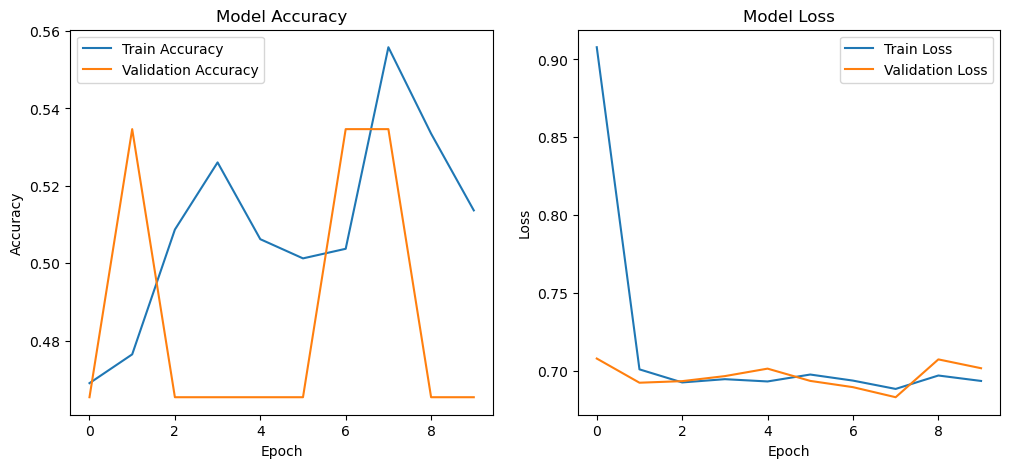

In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

dataset_path = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task2\Dataset"
img_size = 128

X = []
y = []

classes = os.listdir(dataset_path)
for idx, label in enumerate(classes):
    class_path = os.path.join(dataset_path, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = image.load_img(img_path, target_size=(img_size, img_size))
        img_array = image.img_to_array(img)
        X.append(img_array)
        y.append(idx)

X = np.array(X) / 255.0
y = np.array(y)
y = to_categorical(y, num_classes=len(classes))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(img_size, img_size, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

model.save("lung_cancer_model.keras")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 309s 5us/step
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.4923 - loss: 0.9757 - val_accuracy: 0.6832 - val_loss: 0.5047
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.7653 - loss: 0.4689 - val_accuracy: 0.8515 - val_loss: 0.3268
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.8898 - loss: 0.2711 - val_accuracy: 0.9505 - val_loss: 0.2133
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.9605 - loss: 0.1748 - val_accuracy: 0.9604 - val_loss: 0.1737
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.9453 - loss: 0.1652 - val_accuracy: 0.9604 - val_loss: 0.1481
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.9855 - loss: 0.1155 - val_accuracy: 0.9604 - val_loss: 0.1421
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.9752 - loss: 0.1079 - val_accuracy: 0.9703 - val_loss: 0.1234
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9

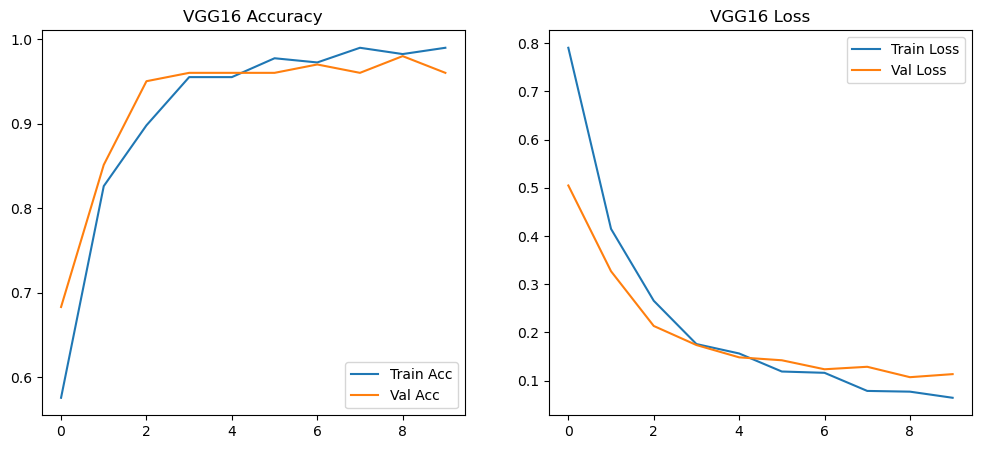

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[es],
    verbose=1
)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("VGG16 Transfer Learning Test Accuracy:", acc)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("VGG16 Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("VGG16 Loss")
plt.show()

model.save("best_vgg16_model.keras")


In [14]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

dataset_dir = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task2\Dataset"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=output)

model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vgg_history = model_vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

plt.plot(vgg_history.history['accuracy'], label='Train Acc')
plt.plot(vgg_history.history['val_accuracy'], label='Val Acc')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("vgg16_accuracy.png")
plt.close()

plt.plot(vgg_history.history['loss'], label='Train Loss')
plt.plot(vgg_history.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("vgg16_loss.png")
plt.close()

print("VGG16 training done. Accuracy and loss graphs saved as PNGs.")


Found 404 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 165s 13s/step - accuracy: 0.5782 - loss: 2.2897 - val_accuracy: 0.9500 - val_loss: 0.1275
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 165s 13s/step - accuracy: 0.9022 - loss: 0.2978 - val_accuracy: 0.9600 - val_loss: 0.0938
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 163s 13s/step - accuracy: 0.9769 - loss: 0.1184 - val_accuracy: 0.9700 - val_loss: 0.0622
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 169s 13s/step - accuracy: 0.9769 - loss: 0.0782 - val_accuracy: 0.9700 - val_loss: 0.0578
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 172s 13s/step - accuracy: 0.9920 - loss: 0.0407 - val_accuracy: 0.9700 - val_loss: 0.0612
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 175s 14s/step - accuracy: 0.9978 - loss: 0.0316 - val_accuracy: 0.9900 - val_loss: 0.0436
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 190s 15s/step - accuracy: 0.9895 - loss: 0.0289 - val_accuracy: 0.9700 - val_loss: 0.0477
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 211s 17s/step - accuracy: 1.0000 - loss: 0.0239 - val_accuracy: 0.

In [18]:
import matplotlib.pyplot as plt
import os

graph_dir = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task2\Graphs"
os.makedirs(graph_dir, exist_ok=True)

plt.figure()
plt.plot(vgg_history.history['accuracy'], label='Train Acc')
plt.plot(vgg_history.history['val_accuracy'], label='Val Acc')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(os.path.join(graph_dir, "vgg16_accuracy.png"))
plt.close()

plt.figure()
plt.plot(vgg_history.history['loss'], label='Train Loss')
plt.plot(vgg_history.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(graph_dir, "vgg16_loss.png"))
plt.close()


In [ ]:
from fpdf import FPDF
import os

graph_dir = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task2\Graphs"
pdf_path = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task2\Cancer_Detection_Report.pdf"

cnn_test_accuracy = 0.7228
vgg_test_accuracy = max(vgg_history.history['val_accuracy'])

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "Cancer Detection Using Histopathological Images", ln=True, align='C')

pdf.ln(10)
pdf.set_font("Arial", '', 12)
pdf.multi_cell(0, 7, "Objective:\nLearn the basics of image data preprocessing and training CNNs for cancer detection using histopathological images.")

pdf.ln(5)
pdf.multi_cell(0, 7, "Dataset:\nWe used a subset of lung cancer histopathological images consisting of 250 Lung Cancer and 250 Normal images. Images were resized to 128x128 for CNN and 224x224 for VGG16. Dataset split: 80% training, 20% validation.")

pdf.ln(5)
pdf.multi_cell(0, 7, "Data Preprocessing:\n- Resized images to 128x128 (CNN) and 224x224 (VGG16)\n- Normalized pixel values to [0,1]\n- Automatically split dataset into training and validation sets (80/20)")

pdf.ln(5)
pdf.multi_cell(0, 7, "Model Training:\n- CNN: 3 convolutional layers, 10 epochs\n- VGG16: Transfer learning with pre-trained ImageNet weights, 10 epochs, fully connected layers added on top")

pdf.ln(5)
pdf.multi_cell(0, 7, f"Evaluation:\n- CNN Test Accuracy: {cnn_test_accuracy*100:.2f}%\n- VGG16 Validation Accuracy: {vgg_test_accuracy*100:.2f}%")

pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, "Graphs", ln=True)

cnn_acc_path = os.path.join(graph_dir, "cnn_accuracy.png")
cnn_loss_path = os.path.join(graph_dir, "cnn_loss.png")
vgg_acc_path = os.path.join(graph_dir, "vgg16_accuracy.png")
vgg_loss_path = os.path.join(graph_dir, "vgg16_loss.png")

if os.path.exists(cnn_acc_path):
    pdf.ln(5)
    pdf.cell(0, 10, "CNN Accuracy", ln=True)
    pdf.image(cnn_acc_path, w=180)

if os.path.exists(cnn_loss_path):
    pdf.ln(5)
    pdf.cell(0, 10, "CNN Loss", ln=True)
    pdf.image(cnn_loss_path, w=180)

if os.path.exists(vgg_acc_path):
    pdf.ln(5)
    pdf.cell(0, 10, "VGG16 Accuracy", ln=True)
    pdf.image(vgg_acc_path, w=180)

if os.path.exists(vgg_loss_path):
    pdf.ln(5)
    pdf.cell(0, 10, "VGG16 Loss", ln=True)
    pdf.image(vgg_loss_path, w=180)

pdf.ln(10)
pdf.set_font("Arial", '', 12)
pdf.multi_cell(0, 7, "Conclusion:\n- CNN provides a basic model for cancer detection with moderate accuracy.\n- VGG16 Transfer Learning significantly improves accuracy using pre-trained ImageNet features.\n- Both models and graphs are included for comparison and evaluation purposes.")

pdf.output(pdf_path)

print("PDF report generated at:", pdf_path)
